In [ ]:
!pip install 'pycaret[full]==2.3.6'
!pip install 'jinja2==3.0.1'
!pip install 'tornado==4.5.3'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 13.1 MB/s 
     |████████████████████████████████| 2.0 MB 45.8 MB/s 
     |████████████████████████████████| 25.9 MB 10.2 MB/s 
     |████████████████████████████████| 17.9 MB 520 kB/s 
     |████████████████████████████████| 262 kB 11.8 MB/s 
     |████████████████████████████████| 167 kB 19.1 MB/s 
     |████████████████████████████████| 10.4 MB 43.1 MB/s 
     |████████████████████████████████| 125 kB 41.1 MB/s 
     |████████████████████████████████| 1.3 MB 40.3 MB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 6.8 MB 21.9 MB/s 
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.7 MB 37.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing whee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 15.1 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.1 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.1 which is incompatible.
datascience 0.

In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
uploaded = files.upload()


Saving default of credit card clients.csv to default of credit card clients.csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['default of credit card clients.csv']),
               sep=';',
               decimal='.',
               encoding='UTF-8')

In [ ]:
df_selected=df2.rename(columns={'default payment next month':'Default'})

base = df_selected.copy()



In [ ]:
base


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:

base['LIMIT_BAL_D1'] = np.where(base['LIMIT_BAL']<40000,1,0)
base['LIMIT_BAL_D2'] = np.where(base['LIMIT_BAL']>=200000,1,0)

base['SEX_D1'] = np.where(base['SEX']==1,1,0)

base['EDUCATION_D1'] = np.where(base['EDUCATION']==1,1,0)
base['EDUCATION_D2'] = np.where(base['EDUCATION']==3,1,0)
base['EDUCATION_D3'] = np.where(base['EDUCATION']==4,1,0)
base['EDUCATION_D4'] = np.where(base['EDUCATION'].isin([5,6,0]),1,0)

base['MARRIAGE_D1'] = np.where(base['MARRIAGE']==0,1,0)
base['MARRIAGE_D2'] = np.where(base['MARRIAGE']==3,1,0)

base['AGE_D1'] = np.where(base['AGE']>=50,1,0)

base['PAY_0_D1'] = np.where(base['PAY_0']<=0,1,0)
base['PAY_0_D2'] = np.where(base['PAY_0']==1,1,0)

base['PAY_2_D1'] = np.where(base['PAY_2']<=1,1,0)

base['PAY_3_D1'] = np.where(base['PAY_3']<=1,1,0)
base['PAY_3_D2'] = np.where(base['PAY_3']==2,1,0)

base['PAY_4_D1'] = np.where(base['PAY_4']<=1,1,0)
base['PAY_4_D2'] = np.where(base['PAY_4']==2,1,0)

base['PAY_5_D1'] = np.where(base['PAY_5']<=1,1,0)
base['PAY_5_D2'] = np.where(base['PAY_5']==2,1,0)

base['PAY_6_D1'] = np.where(base['PAY_6']<=1,1,0)
base['PAY_6_D2'] = np.where(base['PAY_6']==2,1,0)

base['BILL_AMT1_D1'] = np.where(base['BILL_AMT1']<=1000,1,0)
base['BILL_AMT1_D2'] = np.where(base['BILL_AMT1']>=50000,1,0)

base['BILL_AMT2_D1'] = np.where(base['BILL_AMT2']>=50000,1,0)

base['BILL_AMT5_D1'] = np.where(base['BILL_AMT2']>=50000,1,0)

base['PAY_AMT1_D1'] = np.where(base['PAY_AMT1']==0,1,0)
base['PAY_AMT1_D2'] = np.where((base['PAY_AMT1']>=5000)&(base['PAY_AMT1']<10000),1,0)
base['PAY_AMT1_D3'] = np.where(base['PAY_AMT1']>=10000,1,0)

base['PAY_AMT2_D1'] = np.where(base['PAY_AMT2']==0,1,0)
base['PAY_AMT2_D2'] = np.where((base['PAY_AMT2']>=5000)&(base['PAY_AMT2']<10000),1,0)
base['PAY_AMT2_D3'] = np.where(base['PAY_AMT2']>=10000,1,0)

base['PAY_AMT3_D1'] = np.where(base['PAY_AMT3']==0,1,0)
base['PAY_AMT3_D2'] = np.where((base['PAY_AMT3']>=5000)&(base['PAY_AMT3']<10000),1,0)
base['PAY_AMT3_D3'] = np.where(base['PAY_AMT3']>=10000,1,0)

base['PAY_AMT4_D1'] = np.where(base['PAY_AMT4']==0,1,0)
base['PAY_AMT4_D2'] = np.where((base['PAY_AMT4']>=5000)&(base['PAY_AMT4']<10000),1,0)
base['PAY_AMT4_D3'] = np.where(base['PAY_AMT4']>=10000,1,0)

base['PAY_AMT5_D1'] = np.where(base['PAY_AMT5']==0,1,0)
base['PAY_AMT5_D2'] = np.where((base['PAY_AMT5']>=5000)&(base['PAY_AMT5']<10000),1,0)
base['PAY_AMT5_D3'] = np.where(base['PAY_AMT5']>=10000,1,0)

base['PAY_AMT6_D1'] = np.where(base['PAY_AMT6']==0,1,0)
base['PAY_AMT6_D2'] = np.where((base['PAY_AMT6']>=5000)&(base['PAY_AMT6']<10000),1,0)
base['PAY_AMT6_D3'] = np.where(base['PAY_AMT6']>=10000,1,0)



In [ ]:
base_modelo=base[['Default','LIMIT_BAL_D1', 'LIMIT_BAL_D2', 'SEX_D1',
       'EDUCATION_D1', 'EDUCATION_D2', 'EDUCATION_D3', 'EDUCATION_D4',
       'MARRIAGE_D1', 'MARRIAGE_D2', 'AGE_D1', 'PAY_0_D1', 'PAY_0_D2',
       'PAY_2_D1', 'PAY_3_D1', 'PAY_3_D2', 'PAY_4_D1', 'PAY_4_D2', 'PAY_5_D1',
       'PAY_5_D2', 'PAY_6_D1', 'PAY_6_D2', 'BILL_AMT1_D1', 'BILL_AMT1_D2',
       'BILL_AMT2_D1', 'BILL_AMT5_D1', 'PAY_AMT1_D1', 'PAY_AMT1_D2',
       'PAY_AMT1_D3', 'PAY_AMT2_D1', 'PAY_AMT2_D2', 'PAY_AMT2_D3',
       'PAY_AMT3_D1', 'PAY_AMT3_D2', 'PAY_AMT3_D3', 'PAY_AMT4_D1',
       'PAY_AMT4_D2', 'PAY_AMT4_D3', 'PAY_AMT5_D1', 'PAY_AMT5_D2',
       'PAY_AMT5_D3', 'PAY_AMT6_D1', 'PAY_AMT6_D2', 'PAY_AMT6_D3']]

In [ ]:
#data = base_modelo.sample(frac=0.8, random_state=786)
#data_unseen = base_modelo.drop(data.index)
#data.reset_index(inplace=True, drop=True)
#data_unseen.reset_index(inplace=True, drop=True)
#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (24000, 44)
Unseen Data For Predictions: (6000, 44)


In [ ]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#exp_clf101 = setup(data = base_modelo, target = 'Default', session_id=123,train_size = 0.8,fix_imbalance = True) 
exp_clf101 = setup(data = base_modelo, target = 'Default', session_id=123,train_size = 0.8) 


,Description,Value
0,session_id,123
1,Target,Default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(30000, 44)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,43
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8220,0.7711,0.3749,0.6807,0.4832,0.3864,0.4117,0.338
gbc,Gradient Boosting Classifier,0.8205,0.7739,0.3719,0.6742,0.4792,0.3815,0.4063,1.723
lda,Linear Discriminant Analysis,0.8199,0.7717,0.3700,0.6722,0.4770,0.3792,0.4040,0.174
ridge,Ridge Classifier,0.8193,0.0000,0.3425,0.6880,0.4570,0.3630,0.3950,0.041
svm,SVM - Linear Kernel,0.8187,0.0000,0.3256,0.6973,0.4435,0.3520,0.3886,0.259
catboost,CatBoost Classifier,0.8177,0.7650,0.3710,0.6597,0.4746,0.3747,0.3976,10.038
lr,Logistic Regression,0.8174,0.7711,0.3325,0.6836,0.4471,0.3531,0.3861,0.682
ada,Ada Boost Classifier,0.8168,0.7710,0.3250,0.6856,0.4407,0.3475,0.3823,0.616
xgboost,Extreme Gradient Boosting,0.8168,0.7571,0.3775,0.6515,0.4777,0.3761,0.3968,3.847
rf,Random Forest Classifier,0.8008,0.7331,0.3738,0.5800,0.4545,0.3395,0.3519,1.993


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8104,0.7570,0.3302,0.6423,0.4362,0.3361,0.3630
1,0.8158,0.7620,0.3433,0.6655,0.4530,0.3555,0.3837
2,0.8167,0.7731,0.3265,0.6824,0.4416,0.3479,0.3818
3,0.8200,0.7645,0.3340,0.6980,0.4518,0.3598,0.3948
4,0.8104,0.7700,0.3283,0.6434,0.4348,0.3350,0.3624
5,0.8158,0.7615,0.2964,0.7022,0.4169,0.3283,0.3715
6,0.8346,0.7918,0.3827,0.7500,0.5068,0.4197,0.4541
7,0.8162,0.7733,0.3358,0.6729,0.4481,0.3523,0.3830
8,0.8179,0.7754,0.3202,0.6980,0.4390,0.3477,0.3854
9,0.8162,0.7823,0.3277,0.6809,0.4425,0.3482,0.3817


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8121,0.7570,0.3377,0.6475,0.4439,0.3440,0.3704
1,0.8162,0.7621,0.3452,0.6667,0.4549,0.3575,0.3856
2,0.8171,0.7731,0.3283,0.6836,0.4436,0.3499,0.3837
3,0.8200,0.7642,0.3340,0.6980,0.4518,0.3598,0.3948
4,0.8108,0.7700,0.3283,0.6458,0.4353,0.3359,0.3637
5,0.8158,0.7610,0.2964,0.7022,0.4169,0.3283,0.3715
6,0.8342,0.7918,0.3827,0.7473,0.5062,0.4188,0.4527
7,0.8162,0.7735,0.3358,0.6729,0.4481,0.3523,0.3830
8,0.8179,0.7756,0.3202,0.6980,0.4390,0.3477,0.3854
9,0.8162,0.7823,0.3277,0.6809,0.4425,0.3482,0.3817


In [ ]:
print(tuned_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
!pip install 'matplotlib==3.1.1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 1.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
autoviz 0.1.41 requires matplotlib>=3.3.3, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


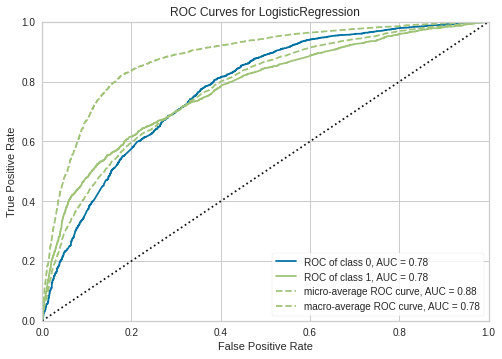

In [ ]:
plot_model(tuned_lr, plot = 'auc')

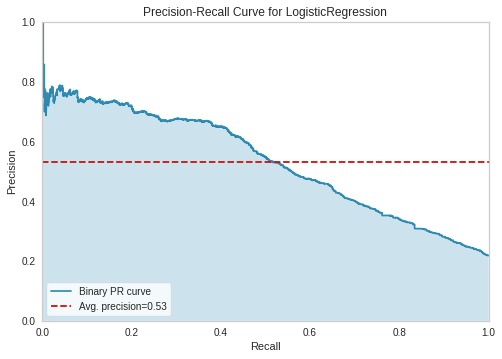

In [ ]:
plot_model(tuned_lr, plot = 'pr')

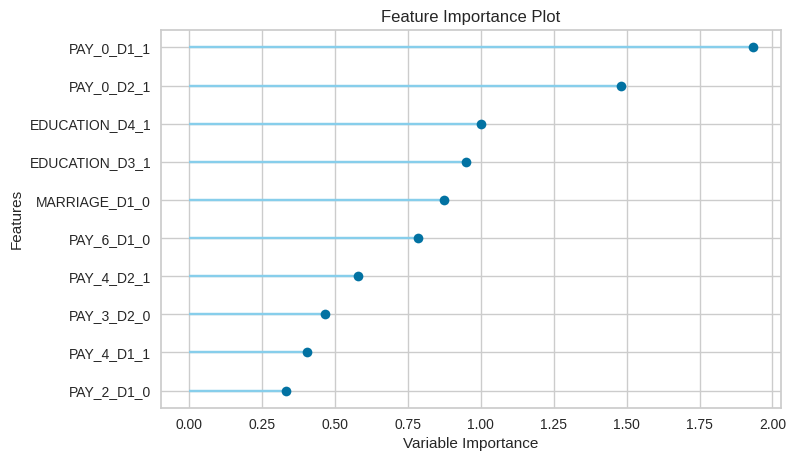

In [ ]:
plot_model(tuned_lr, plot='feature')

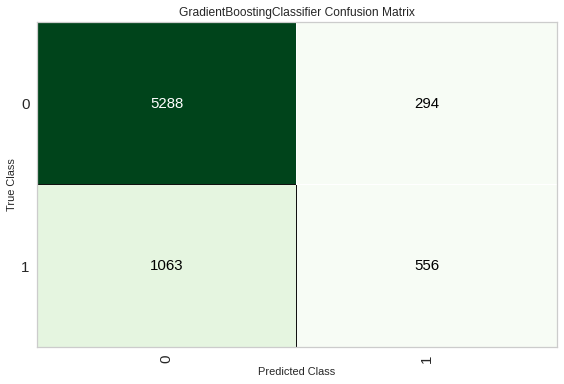

In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8213,0.7761,0.3474,0.6721,0.458,0.3638,0.3923


In [ ]:
final_lr = finalize_model(tuned_lr)


In [ ]:
print(final_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7652,0.7776,0.612,0.4691,0.5311,0.3781,0.384


In [ ]:
unseen_predictions = predict_model(final_lr, data=base_modelo)
unseen_predictions.head()
unseen_predictions.to_csv('output_modelo.csv', encoding = 'utf-8-sig') 
files.download('output_modelo.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>